# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [147]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [148]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [149]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [150]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [151]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [152]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.7,99,1.0
1,2023-01-01T01:00,10.5,99,1.0
2,2023-01-01T02:00,10.4,98,0.1
3,2023-01-01T03:00,10.3,96,0.0
4,2023-01-01T04:00,9.7,95,0.0


In [153]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [154]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


C:\Users\tanne\AppData\Local\Temp\ipykernel_5292\1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [155]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.371429,86.422619,0.142857
std,3.495063,12.799933,0.436037
min,0.400000,45.000000,0.000000
25%,5.900000,81.000000,0.000000
50%,8.250000,90.500000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


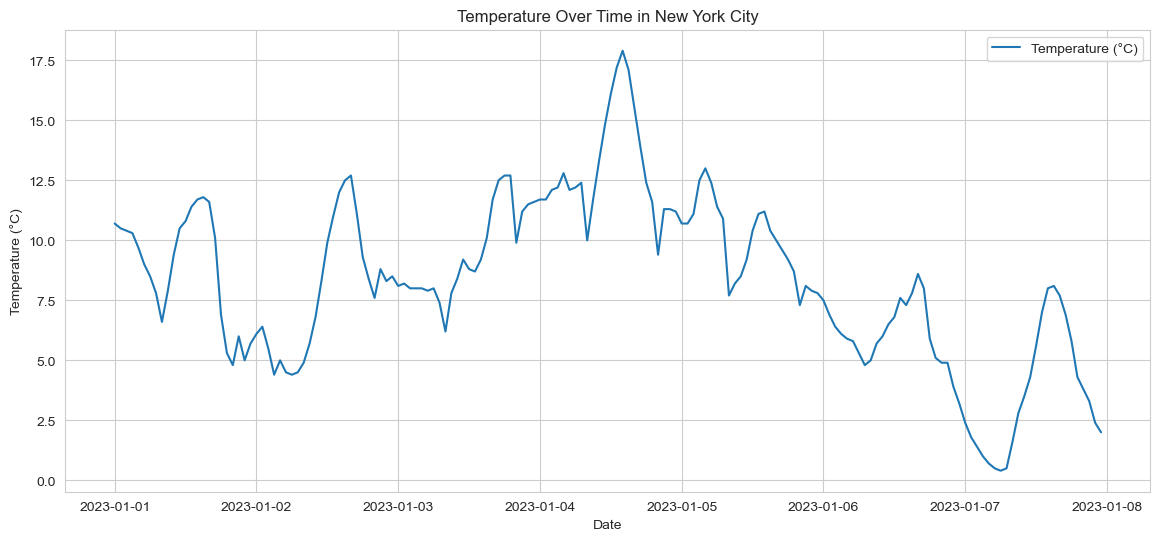

In [156]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

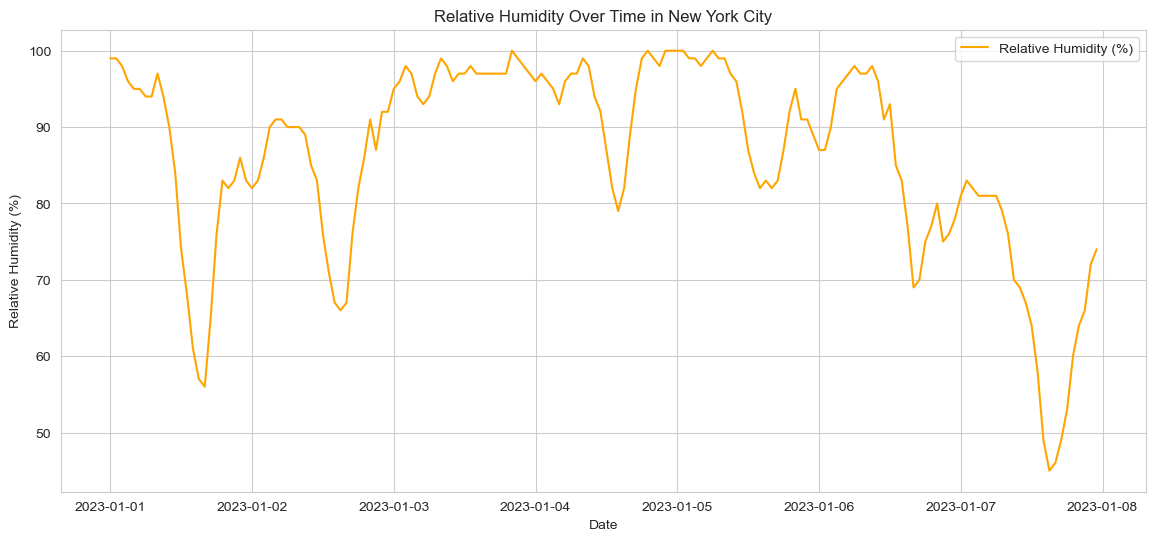

In [157]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


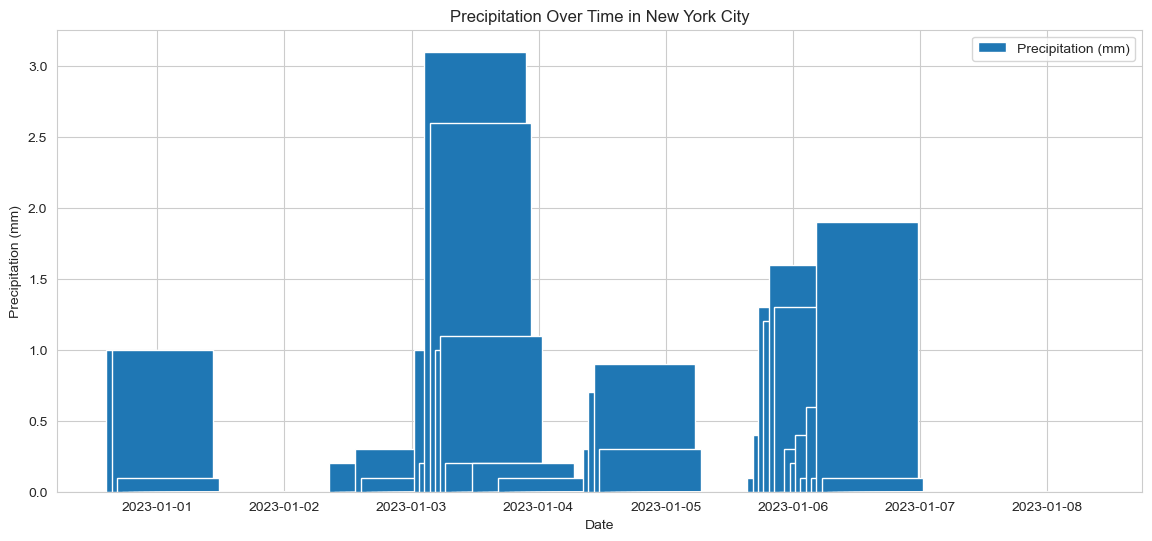

In [158]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [159]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.24


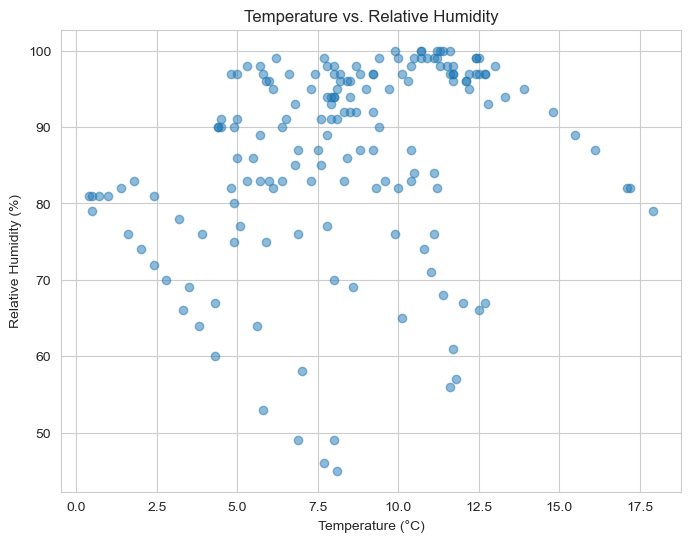

In [160]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [161]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.850000,83.708333,0.087500
2023-01-02,7.775000,83.458333,0.020833
2023-01-03,9.408333,96.875000,0.395833
2023-01-04,12.995833,94.166667,0.095833
2023-01-05,9.916667,92.666667,0.000000


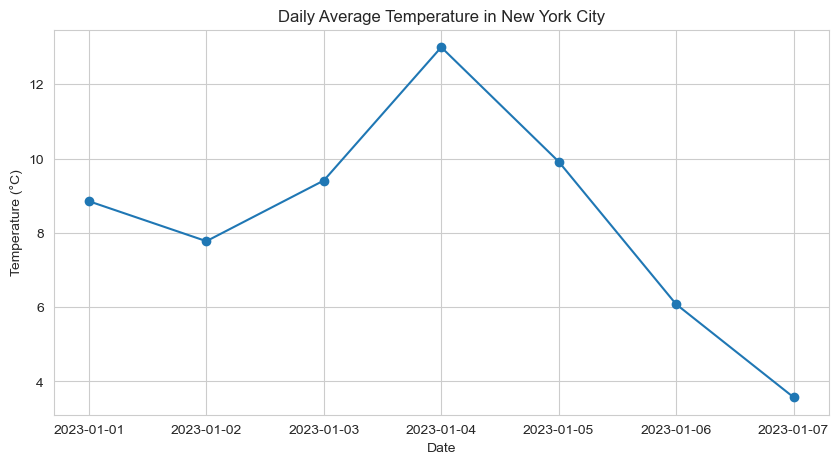

In [162]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [163]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


C:\Users\tanne\AppData\Local\Temp\ipykernel_5292\4259999984.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [164]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [165]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


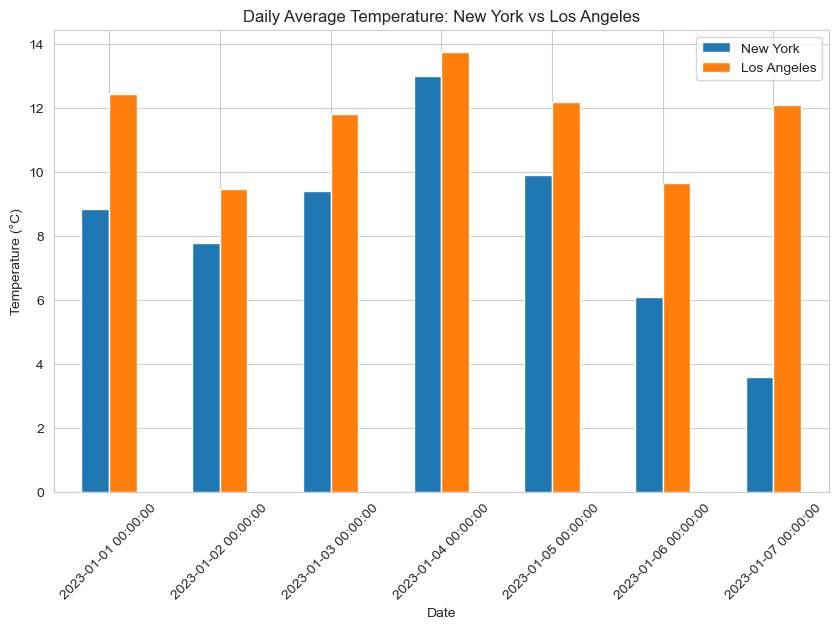

In [166]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [167]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.850000,12.433333,3.583333
2023-01-02,7.775000,9.483333,1.708333
2023-01-03,9.408333,11.808333,2.400000
2023-01-04,12.995833,13.766667,0.770833
2023-01-05,9.916667,12.183333,2.266667
2023-01-06,6.079167,9.662500,3.583333
2023-01-07,3.575000,12.095833,8.520833


In [168]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


In [169]:
# As its in the same notebook, no need to import again
# Set Up Parameters
# Location coordinates for London and Seattle
latitude_lon = 51.5074
longitude_lon = -0.1278
latitude_sea = 47.6062
longitude_sea = -122.3321

# Date range
start_date = '2022-01-01'
end_date = '2022-12-31'  # One year of data

# Variables to fetch
hourly_variables = 'precipitation'

In [170]:
# Make the API Request
base_url = 'https://archive-api.open-meteo.com/v1/archive'
params_lon = {
    'latitude': latitude_lon,
    'longitude': longitude_lon,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': hourly_variables,
    'timezone': 'Europe/London'
}


response_lon = requests.get(base_url, params=params_lon)


In [171]:
# Seattle Request
params_sea = {
    'latitude': latitude_sea,
    'longitude': longitude_sea,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': hourly_variables,
    'timezone': 'America/Los_Angeles' # No Seattle timezone in API
}

response_sea = requests.get(base_url, params=params_sea)

In [172]:
# Check if the request was successful

if response_lon.status_code == 200:
    print('Data fetched.')
else:
    print(f'Failed. Status code: {response_lon.status_code}')

Data fetched.


In [173]:
# Check if the request was successful for Seattle

if response_sea.status_code == 200:
    print('Data fetched.')
else:
    print(f'Failed. Status code: {response_sea.status_code}')

Data fetched.


In [174]:
# Load Data into pandas DataFrame
data_lon = response_lon.json()
hourly_data_lon = data_lon['hourly']
df_lon = pd.DataFrame(hourly_data_lon)
print(df_lon.head())

               time  precipitation
0  2022-01-01T00:00            0.0
1  2022-01-01T01:00            0.0
2  2022-01-01T02:00            0.0
3  2022-01-01T03:00            0.0
4  2022-01-01T04:00            0.0


In [175]:
# Load Data into pandas DataFrame Seattle
data_sea = response_sea.json()
hourly_data_sea = data_sea['hourly']
df_sea = pd.DataFrame(hourly_data_sea)
print(df_sea.head())

               time  precipitation
0  2022-01-01T00:00            0.0
1  2022-01-01T01:00            0.0
2  2022-01-01T02:00            0.0
3  2022-01-01T03:00            0.0
4  2022-01-01T04:00            0.0


In [176]:
# Data Cleaning
# Convert 'time' column to datetime
df_lon['time'] = pd.to_datetime(df_lon['time'])
df_lon.set_index('time', inplace=True)
print(df_lon.head())

                     precipitation
time                              
2022-01-01 00:00:00            0.0
2022-01-01 01:00:00            0.0
2022-01-01 02:00:00            0.0
2022-01-01 03:00:00            0.0
2022-01-01 04:00:00            0.0


In [177]:
# Data Cleaning Seattle
# Convert 'time' column to datetime
df_sea['time'] = pd.to_datetime(df_sea['time'])
df_sea.set_index('time', inplace=True)
print(df_sea.head())

                     precipitation
time                              
2022-01-01 00:00:00            0.0
2022-01-01 01:00:00            0.0
2022-01-01 02:00:00            0.0
2022-01-01 03:00:00            0.0
2022-01-01 04:00:00            0.0


In [178]:
# Check for missing values
df_lon.isnull().sum()

precipitation    0
dtype: int64

In [179]:
# Check for missing values
df_sea.isnull().sum()

precipitation    0
dtype: int64

In [180]:
# Handle missing values (if any)
df_lon.fillna(method='ffill', inplace=True)
df_sea.fillna(method='ffill', inplace=True)

C:\Users\tanne\AppData\Local\Temp\ipykernel_5292\1025911224.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_lon.fillna(method='ffill', inplace=True)
C:\Users\tanne\AppData\Local\Temp\ipykernel_5292\1025911224.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sea.fillna(method='ffill', inplace=True)


In [181]:
# Resample Data to Daily Totals
weekly_total_lon = df_lon.resample('W').sum()
weekly_total_sea = df_sea.resample('W').sum()

In [182]:
# Combine DataFrames for Comparison

combined_prec = pd.DataFrame({
    'London': weekly_total_lon['precipitation'],
    'Seattle': weekly_total_sea['precipitation']
})
print(combined_prec.tail())

            London  Seattle
time                       
2022-12-04     3.5     43.7
2022-12-11     0.7     35.2
2022-12-18    10.6      3.7
2022-12-25    17.5     63.5
2023-01-01    24.9     74.8


In [183]:
# Save data
combined_prec.to_csv('london_seattle_precipitation_comparison.csv')

In [184]:
info_lon = combined_prec['London'].describe()
info_sea = combined_prec['Seattle'].describe()
print(info_lon)
print(info_sea)

count    53.000000
mean     12.511321
std      13.596134
min       0.000000
25%       3.100000
50%       7.700000
75%      17.500000
max      67.800000
Name: London, dtype: float64
count     53.000000
mean      21.343396
std       23.928937
min        0.000000
25%        2.100000
50%       10.800000
75%       35.200000
max      108.800000
Name: Seattle, dtype: float64


In [185]:
sum_lon = combined_prec['London'].sum()
sum_sea = combined_prec['Seattle'].sum()
print(f"London: {sum_lon}")
print(f"Seattle: {sum_sea}")

London: 663.1
Seattle: 1131.2


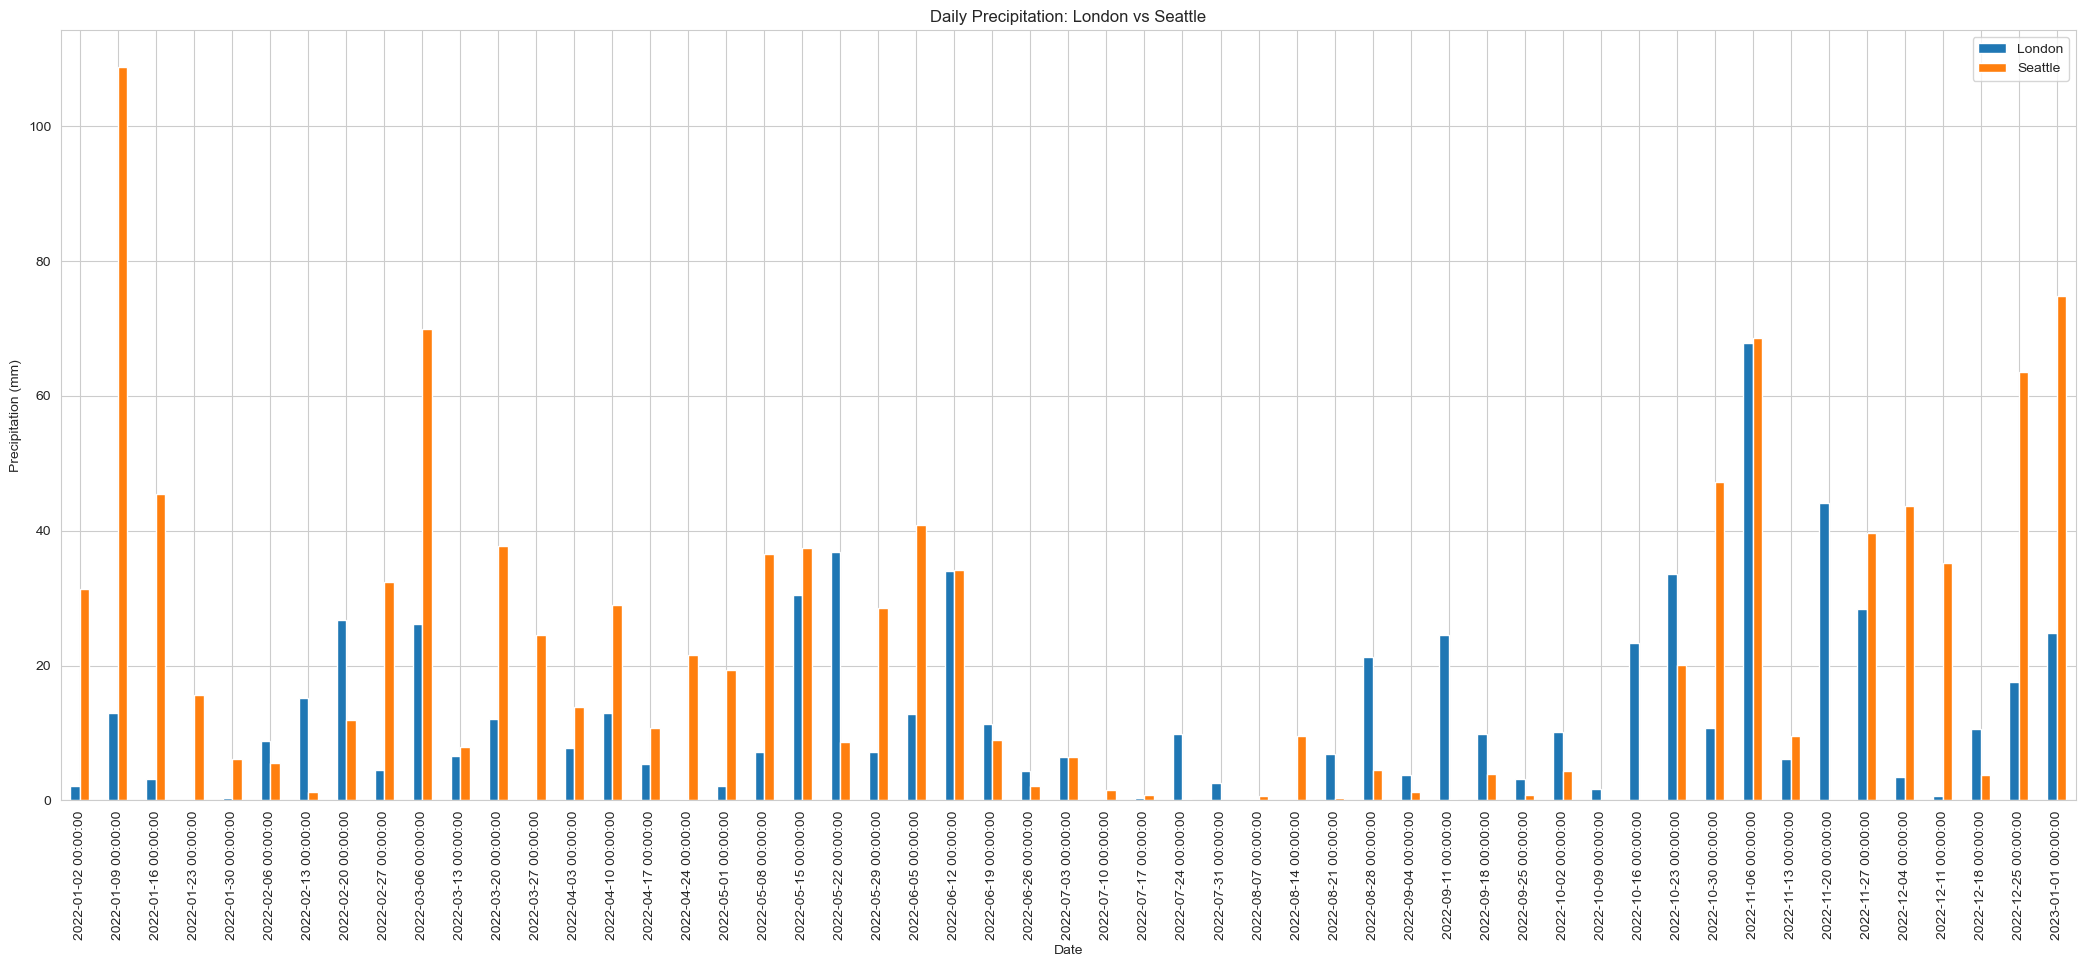

In [186]:
# Plot Comparison of Daily Average Temperature

combined_prec[['London', 'Seattle']].plot(kind='bar', figsize=(26, 10)) # 52 Weeks in a year to make room for the big graph
plt.title('Daily Precipitation: London vs Seattle')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [187]:
# Anylysis (If negative values appear they mean Seattle had more precipitation that week)
combined_prec['Precipitation Difference'] = combined_prec['London'] - combined_prec['Seattle']

In [188]:
total_diff_prec = combined_prec['Precipitation Difference'].sum()
# Show who had more precipitation over the year
if total_diff_prec > 0:
    print(f'London had more total precipitation by {total_diff_prec} mm over the year.')
else: 
    print(f'Seattle had more total precipitation by {-total_diff_prec} mm over the year.')

Seattle had more total precipitation by 468.09999999999997 mm over the year.


## Analyst summary — London vs Seattle (weekly precipitation, 2022)

Key metrics to report

- Total annual precipitation: 
  - London = 663.1 mm
  - Seattle = 1131.2 mm
- Mean weekly precipitation
  - London = 12.511321 mm
  - Seattle = 21.343396 mm
- Peak week and max amount of predication
  - London:
    - Peak Week = 2022-11-06
    - Max = 67.8 mm
  - Seattle;
    - Peak Week = 2022-01-09
    - Max = 108.8 mm 

### Seattle had more total precipitation by 468.1 mm over the year.
    Due to the fact that on average Seattle had more rain per week than London, we can assume Seattle gets more rain. However, looking at the max rain in a week for each place you notice some weeks have far more predication than others. Leading to some major outliers in the data. Also looking at the graph above there are many weeks that both places got little to no rain. 
